<a href="https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/fondue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dexpy

  Preparing metadata (setup.py) ... done
  Created wheel for dexpy: filename=dexpy-0.12-py3-none-any.whl size=30216 sha256=cdae74c8c595267fb44d44701405263d471aacbea4dacf4d89c850177d12add6
  Stored in directory: /root/.cache/pip/wheels/9a/17/c2/ea9c81907465bdbedefb72e7206a6f013d15caa3cd39900d37
Successfully built dexpy


In [4]:
import pandas as pd
data=pd.read_csv('fondue_data.csv', sep=';')
data

,StdOrder,RunOrder,PtType,Blocks,Emmenthaler,Gruyere,Wine,Temperature,Flavor,Food
0,1,16,1,1,0.6000,0.0000,0.40,80,53,3
1,2,13,1,1,0.4000,0.0000,0.60,80,31,2
2,3,6,1,1,0.3000,0.3000,0.40,80,75,3
3,4,1,1,1,0.2000,0.2000,0.60,80,64,1
4,5,14,0,1,0.3750,0.1250,0.50,80,57,2
5,6,2,-1,1,0.4875,0.0625,0.45,80,58,3
6,7,10,-1,1,0.3875,0.0625,0.55,80,43,2
7,8,18,-1,1,0.3375,0.2125,0.45,80,73,3
8,9,7,-1,1,0.2875,0.1625,0.55,80,55,2
9,10,4,1,1,0.6000,0.0000,0.40,90,58,3


In [5]:
import plotly.express as px
df = px.data.election()
fig = px.scatter_ternary(data, a="Emmenthaler", b="Gruyere", c="Wine")
fig.show()


Specifiera variabler till din modell



In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

dat=data.loc[:,"Emmenthaler":"Temperature"]
dat.columns=['A', 'B', 'C', 'T']
dat['y']=data.loc[:,'Flavor']
dat
mod = smf.ols(formula='y ~ A + B + C + A:T + B:T+  C:T + A:B + A:C + B:C', data=dat)

res = mod.fit()
res.summary()


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=18



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     35.88
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           6.17e-06
Time:                        08:41:55   Log-Likelihood:                -42.048
No. Observations:                  18   AIC:                             102.1
Df Residuals:                       9   BIC:                             110.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.6446    147.850      0.728      0.485    -226.816     442.106
A            213.3926    215.083      0.992      0.347    -273.160     699.945
B           -464.2339    281.660     -1.648      0.134   -1101.394     172.926
C            358.4859    233.361      1.536      0.159    -169.413     886.385
A:T            2.1051      1.213      1.735      0.117      -0.640       4.850
B:T            3.1513      1.736      1.815      0.103      -0.775       7.078
C:T           -0.8333      1.131     -0.737      0.480      -3.392       1.726
A:B         1200.0000    895.094      1.341      0.213    -824.843    3224.843
A:C        -1675.8394   1413.936     -1.185      0.266   -4874.384    1522.705
B:C         -868.7081    976.178     -0.890      0.397   -3076.976    1339.559
==============================================================================
Omnibus:                        1.741   Durbin-Watson:                   2.836
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                1.011
Skew:                           0.198   Prob(JB):                        0.603
Kurtosis:                       1.909   Cond. No.                     2.71e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.24e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

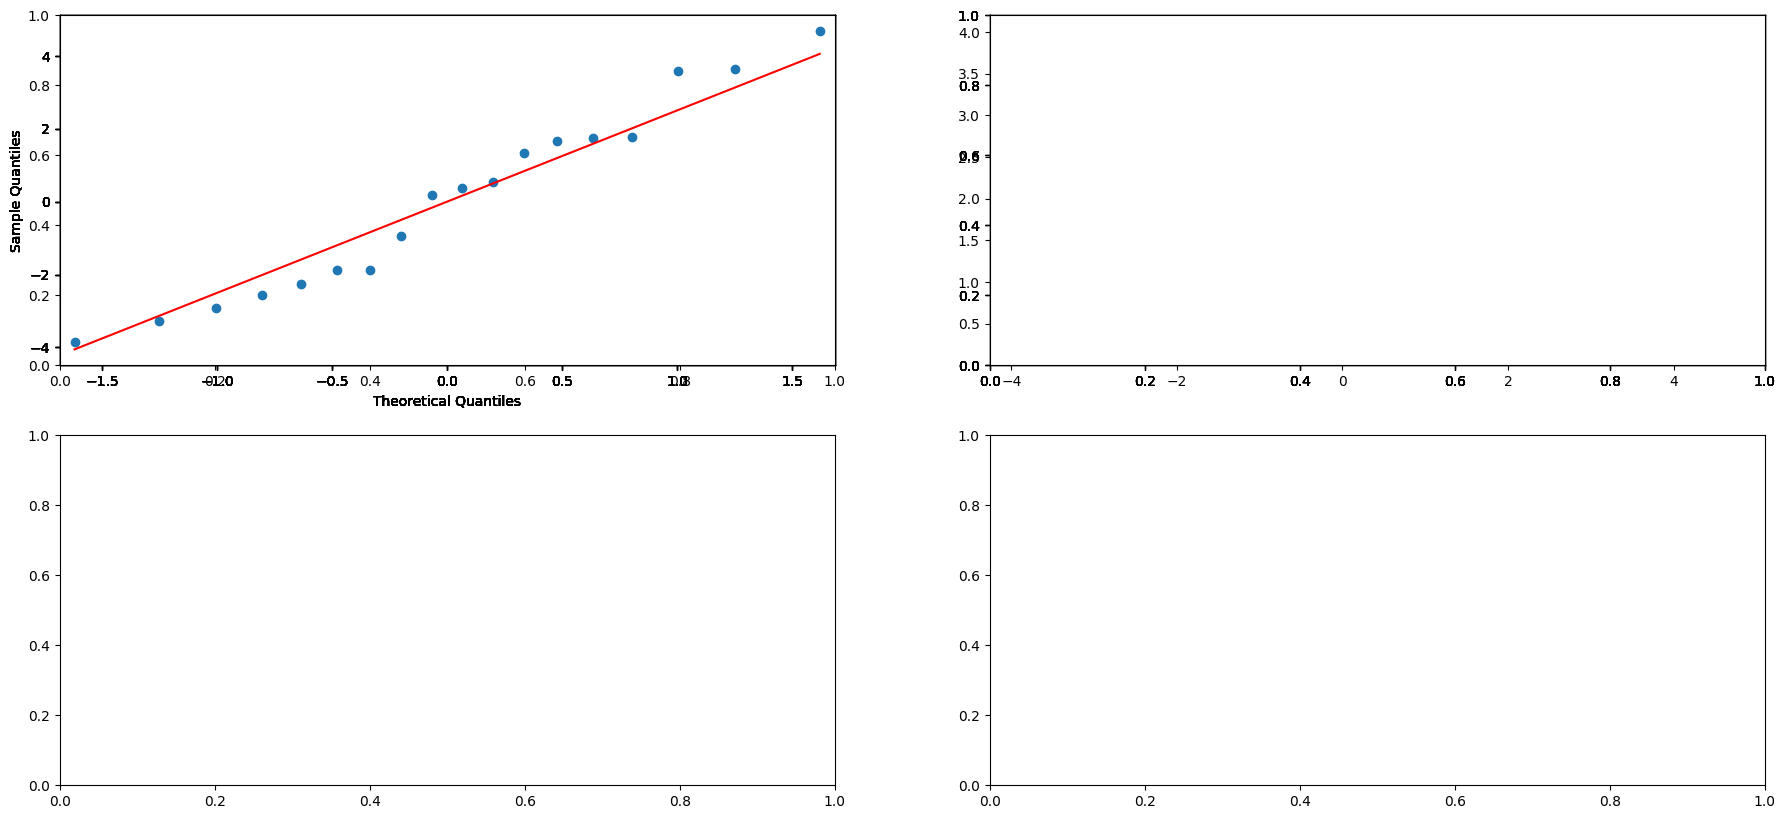

In [48]:
import scipy.stats as stats
import matplotlib.pyplot as plt

residuals = res.resid


ax1 = fig.add_subplot(2, 2, 1)
sm.qqplot(residuals, line="s", ax=ax1)

#ax2 = fig.add_subplot(2, 2, 2)
#plt.bar(residuals)
